In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import yfinance as yf

In [3]:
import datetime
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20,end.month,end.day)

In [4]:
stock = 'GOOG'

In [5]:
dataset = yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [6]:
dataset.head()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2006-01-18,10.998724,11.306504,10.957687,11.057808,822499417
2006-01-19,10.789581,11.210831,10.704293,11.153477,583671575
2006-01-20,9.875143,10.878083,9.758459,10.845204,1650832619
2006-01-23,10.568326,10.590328,10.030146,10.070936,913065614
2006-01-24,10.952247,10.999711,10.740880,10.779198,620902605


In [7]:
dataset.shape

(5032, 5)

In [8]:
dataset.describe()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
count,5032.000000,5032.000000,5032.000000,5032.000000,5.032000e+03
mean,59.244546,59.861441,58.603935,59.216925,8.787858e+07
std,59.656905,60.320195,58.968339,59.622779,1.101942e+08
min,6.364233,6.659158,6.113560,6.489570,1.584340e+05
25%,14.412477,14.552955,14.290231,14.459385,2.505150e+07
50%,35.264759,35.638581,34.890959,35.180638,4.163040e+07
75%,88.114017,88.969713,87.109169,88.060906,1.090181e+08
max,336.429993,341.200012,334.350006,338.054993,1.650833e+09


In [9]:
dataset.isnull().sum()

Price   Ticker
Close   GOOG      0
High    GOOG      0
Low     GOOG      0
Open    GOOG      0
Volume  GOOG      0
dtype: int64

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5032 entries, 2006-01-18 to 2026-01-16
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, GOOG)   5032 non-null   float64
 1   (High, GOOG)    5032 non-null   float64
 2   (Low, GOOG)     5032 non-null   float64
 3   (Open, GOOG)    5032 non-null   float64
 4   (Volume, GOOG)  5032 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 235.9 KB


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

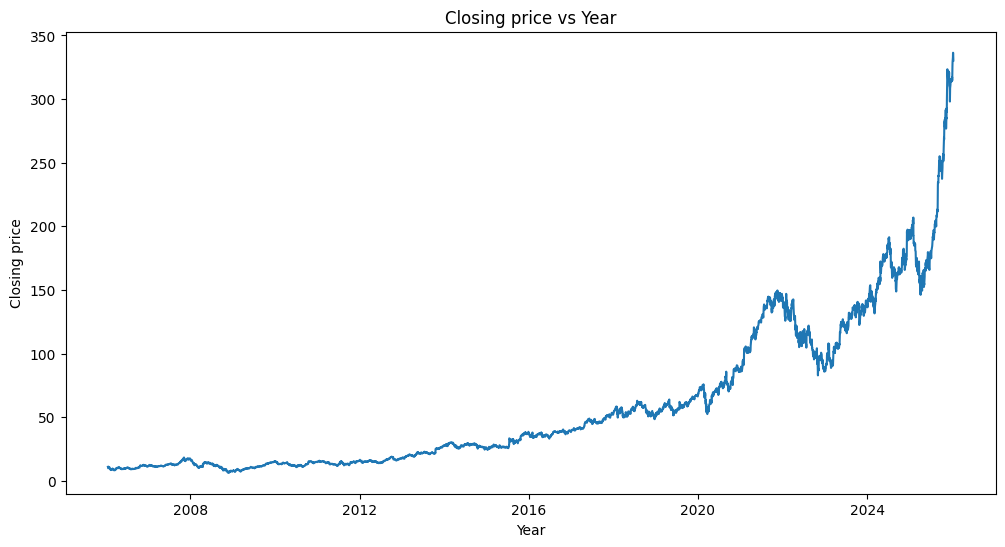

In [12]:
plt.figure(figsize=(12,6))
plt.plot(dataset['Close'])
plt.xlabel("Year")
plt.ylabel("Closing price")
plt.title("Closing price vs Year")
plt.show()